# Project 2
Question: Is there any correlation between birth rate and extreme temperature variations?
Ha: Extreme temperature affects birth rate
H0: There is no correlation between birth rate and temperature. 

The following needs to be fixed in the dataset: 
1) Need to find the correct weight and height figures for children. 
2) Replace weight<4kg with mean value because there is a suspected data entry error

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
sns.set_style('darkgrid')


%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_excel('/Users/KiraEvsanaa/Desktop/ECON628-01-KIRAEVSANAA/datasets/Bangladesh.xls')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 57 columns):
bidx                       2147 non-null int64
hh_id                      2147 non-null int64
year                       2147 non-null int64
month                      2147 non-null int64
maxT                       2147 non-null float64
extremeT                   2147 non-null float64
Births                     2147 non-null int64
v013                       2147 non-null object
v024                       2147 non-null object
v025                       2147 non-null object
v026                       2147 non-null object
education                  2147 non-null object
yrsofedu                   2147 non-null float64
literacy                   2140 non-null object
electricity                2136 non-null object
religion                   2147 non-null object
v133                       2143 non-null float64
location                   2147 non-null object
hhsize                     214

In [4]:
df.shape

(2147, 57)

In [5]:
df.isnull().sum()

bidx                           0
hh_id                          0
year                           0
month                          0
maxT                           0
extremeT                       0
Births                         0
v013                           0
v024                           0
v025                           0
v026                           0
education                      0
yrsofedu                       0
literacy                       7
electricity                   11
religion                       0
v133                           4
location                       0
hhsize                         0
nmbrofwomen                    0
edustatus                      0
nmbrbirths                     0
v206                           0
v207                           0
age                            0
nmbrkids                       0
abortion                       0
hhoccupation                   2
workstatus                     5
bord                           0
livingkids

In [6]:
df.drop(['v026','v133','v206','v207','location1','abortion1','ratio','fsresid','monthdta','conception','religions','literacy1',], axis=1, inplace=True)
df

,bidx,hh_id,year,month,maxT,extremeT,Births,v013,v024,v025,...,work,education1,month_dta,kg,cm,Sex of child,Breastfeeding in months,Prolonged labour,Marriage.age,Class.grade
0,2,212,94,10,91.2000,94.0000,92,25-29,dhaka,rural,...,3,primary,10,1.0,60.0,female,1.0,no,14.0,NaN
1,1,85,94,10,91.2000,94.0000,92,25-29,dhaka,rural,...,2,no education,10,59.0,133.0,female,42.0,yes,14.0,NaN
2,2,64,94,10,91.2000,94.0000,92,30-34,dhaka,rural,...,3,no education,10,7.0,68.0,male,7.0,no,14.0,NaN
3,1,152,92,10,87.6673,92.8364,101,25-29,dhaka,urban,...,1,higher,10,51.0,NaN,male,36.0,no,12.0,3.0
4,1,9,90,10,86.4000,93.0000,126,45-49,dhaka,rural,...,2,no education,10,55.0,113.0,male,30.0,yes,12.0,NaN
5,1,430,96,10,89.7000,96.0000,78,30-34,dhaka,rural,...,3,no education,10,19.0,87.0,male,19.0,no,12.0,NaN
6,1,34,96,10,89.7000,96.0000,78,25-29,dhaka,rural,...,3,no education,10,58.0,154.0,male,24.0,yes,10.0,1.0
7,1,64,94,10,91.2000,94.0000,92,30-34,dhaka,rural,...,3,no education,10,51.0,164.0,male,NaN,yes,14.0,8.0
8,2,250,91,10,87.6673,92.8364,88,20-24,dhaka,rural,...,3,no education,10,2.0,66.0,male,2.0,no,12.0,NaN
9,1,270,95,10,87.6673,92.8364,71,20-24,dhaka,rural,...,1,no education,10,10.0,65.0,female,10.0,yes,13.0,NaN


In [7]:
df.isnull().sum()

bidx                           0
hh_id                          0
year                           0
month                          0
maxT                           0
extremeT                       0
Births                         0
v013                           0
v024                           0
v025                           0
education                      0
yrsofedu                       0
literacy                       7
electricity                   11
religion                       0
location                       0
hhsize                         0
nmbrofwomen                    0
edustatus                      0
nmbrbirths                     0
age                            0
nmbrkids                       0
abortion                       0
hhoccupation                   2
workstatus                     5
bord                           0
livingkids                     0
hh_yrsofedu                    0
birthcntrl                     0
missingyrsofedu                0
lnBirths  

In [8]:
df.rename(columns={
        'Breastfeeding\nin months':'Breastfeeding_in_months',
        'Prolonged\nlabour':'Prolonged_labour',
        'Marriage.age':'Marriage_age_mom',
        'Class.grade': 'Highest_class_grade_child',
    }, inplace=True) 
df

,bidx,hh_id,year,month,maxT,extremeT,Births,v013,v024,v025,...,work,education1,month_dta,kg,cm,Sex of child,Breastfeeding_in_months,Prolonged_labour,Marriage_age_mom,Highest_class_grade_child
0,2,212,94,10,91.2000,94.0000,92,25-29,dhaka,rural,...,3,primary,10,1.0,60.0,female,1.0,no,14.0,NaN
1,1,85,94,10,91.2000,94.0000,92,25-29,dhaka,rural,...,2,no education,10,59.0,133.0,female,42.0,yes,14.0,NaN
2,2,64,94,10,91.2000,94.0000,92,30-34,dhaka,rural,...,3,no education,10,7.0,68.0,male,7.0,no,14.0,NaN
3,1,152,92,10,87.6673,92.8364,101,25-29,dhaka,urban,...,1,higher,10,51.0,NaN,male,36.0,no,12.0,3.0
4,1,9,90,10,86.4000,93.0000,126,45-49,dhaka,rural,...,2,no education,10,55.0,113.0,male,30.0,yes,12.0,NaN
5,1,430,96,10,89.7000,96.0000,78,30-34,dhaka,rural,...,3,no education,10,19.0,87.0,male,19.0,no,12.0,NaN
6,1,34,96,10,89.7000,96.0000,78,25-29,dhaka,rural,...,3,no education,10,58.0,154.0,male,24.0,yes,10.0,1.0
7,1,64,94,10,91.2000,94.0000,92,30-34,dhaka,rural,...,3,no education,10,51.0,164.0,male,NaN,yes,14.0,8.0
8,2,250,91,10,87.6673,92.8364,88,20-24,dhaka,rural,...,3,no education,10,2.0,66.0,male,2.0,no,12.0,NaN
9,1,270,95,10,87.6673,92.8364,71,20-24,dhaka,rural,...,1,no education,10,10.0,65.0,female,10.0,yes,13.0,NaN


In [9]:
df['kg'].fillna(df['kg'].mean(), inplace=True)
df['cm'].fillna(df['cm'].mean(), inplace=True)
df
#There is obviously data entry error from DHS. Birth weight for some babies are 1.00kg and surviving. 

,bidx,hh_id,year,month,maxT,extremeT,Births,v013,v024,v025,...,work,education1,month_dta,kg,cm,Sex of child,Breastfeeding_in_months,Prolonged_labour,Marriage_age_mom,Highest_class_grade_child
0,2,212,94,10,91.2000,94.0000,92,25-29,dhaka,rural,...,3,primary,10,1.000000,60.000000,female,1.0,no,14.0,NaN
1,1,85,94,10,91.2000,94.0000,92,25-29,dhaka,rural,...,2,no education,10,59.000000,133.000000,female,42.0,yes,14.0,NaN
2,2,64,94,10,91.2000,94.0000,92,30-34,dhaka,rural,...,3,no education,10,7.000000,68.000000,male,7.0,no,14.0,NaN
3,1,152,92,10,87.6673,92.8364,101,25-29,dhaka,urban,...,1,higher,10,51.000000,99.650267,male,36.0,no,12.0,3.0
4,1,9,90,10,86.4000,93.0000,126,45-49,dhaka,rural,...,2,no education,10,55.000000,113.000000,male,30.0,yes,12.0,NaN
5,1,430,96,10,89.7000,96.0000,78,30-34,dhaka,rural,...,3,no education,10,19.000000,87.000000,male,19.0,no,12.0,NaN
6,1,34,96,10,89.7000,96.0000,78,25-29,dhaka,rural,...,3,no education,10,58.000000,154.000000,male,24.0,yes,10.0,1.0
7,1,64,94,10,91.2000,94.0000,92,30-34,dhaka,rural,...,3,no education,10,51.000000,164.000000,male,NaN,yes,14.0,8.0
8,2,250,91,10,87.6673,92.8364,88,20-24,dhaka,rural,...,3,no education,10,2.000000,66.000000,male,2.0,no,12.0,NaN
9,1,270,95,10,87.6673,92.8364,71,20-24,dhaka,rural,...,1,no education,10,10.000000,65.000000,female,10.0,yes,13.0,NaN


In [10]:
df['Marriage_age_mom'].fillna(df['Marriage_age_mom'].mean(), inplace=True)
df['Highest_class_grade_child'].fillna(df['Highest_class_grade_child'].mean(), inplace=True)
df['Breastfeeding_in_months'].fillna(df['Breastfeeding_in_months'].mean(), inplace=True)
df

,bidx,hh_id,year,month,maxT,extremeT,Births,v013,v024,v025,...,work,education1,month_dta,kg,cm,Sex of child,Breastfeeding_in_months,Prolonged_labour,Marriage_age_mom,Highest_class_grade_child
0,2,212,94,10,91.2000,94.0000,92,25-29,dhaka,rural,...,3,primary,10,1.000000,60.000000,female,1.000000,no,14.000000,4.92692
1,1,85,94,10,91.2000,94.0000,92,25-29,dhaka,rural,...,2,no education,10,59.000000,133.000000,female,42.000000,yes,14.000000,4.92692
2,2,64,94,10,91.2000,94.0000,92,30-34,dhaka,rural,...,3,no education,10,7.000000,68.000000,male,7.000000,no,14.000000,4.92692
3,1,152,92,10,87.6673,92.8364,101,25-29,dhaka,urban,...,1,higher,10,51.000000,99.650267,male,36.000000,no,12.000000,3.00000
4,1,9,90,10,86.4000,93.0000,126,45-49,dhaka,rural,...,2,no education,10,55.000000,113.000000,male,30.000000,yes,12.000000,4.92692
5,1,430,96,10,89.7000,96.0000,78,30-34,dhaka,rural,...,3,no education,10,19.000000,87.000000,male,19.000000,no,12.000000,4.92692
6,1,34,96,10,89.7000,96.0000,78,25-29,dhaka,rural,...,3,no education,10,58.000000,154.000000,male,24.000000,yes,10.000000,1.00000
7,1,64,94,10,91.2000,94.0000,92,30-34,dhaka,rural,...,3,no education,10,51.000000,164.000000,male,20.043116,yes,14.000000,8.00000
8,2,250,91,10,87.6673,92.8364,88,20-24,dhaka,rural,...,3,no education,10,2.000000,66.000000,male,2.000000,no,12.000000,4.92692
9,1,270,95,10,87.6673,92.8364,71,20-24,dhaka,rural,...,1,no education,10,10.000000,65.000000,female,10.000000,yes,13.000000,4.92692


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bidx,2147.0,1.404751,0.626858,1.000000,1.000000,1.000000,2.000000,4.000000
hh_id,2147.0,139.108989,118.638621,1.000000,46.000000,98.000000,210.000000,555.000000
year,2147.0,93.221705,1.867522,90.000000,92.000000,93.000000,95.000000,96.000000
month,2147.0,7.035398,3.717250,1.000000,3.000000,8.000000,10.000000,12.000000
maxT,2147.0,87.324446,2.685454,77.900000,87.667300,87.667300,87.667300,97.100000
extremeT,2147.0,92.341458,3.127576,81.000000,92.836400,92.836400,92.836400,103.000000
Births,2147.0,89.357243,29.741735,32.000000,65.500000,86.000000,115.000000,173.000000
yrsofedu,2147.0,3.193470,1.023272,0.000000,3.193470,3.193470,3.193470,7.000000
hhsize,2147.0,6.087564,2.443351,2.000000,4.000000,6.000000,7.000000,16.000000
nmbrofwomen,2147.0,1.241733,0.554378,1.000000,1.000000,1.000000,1.000000,5.000000


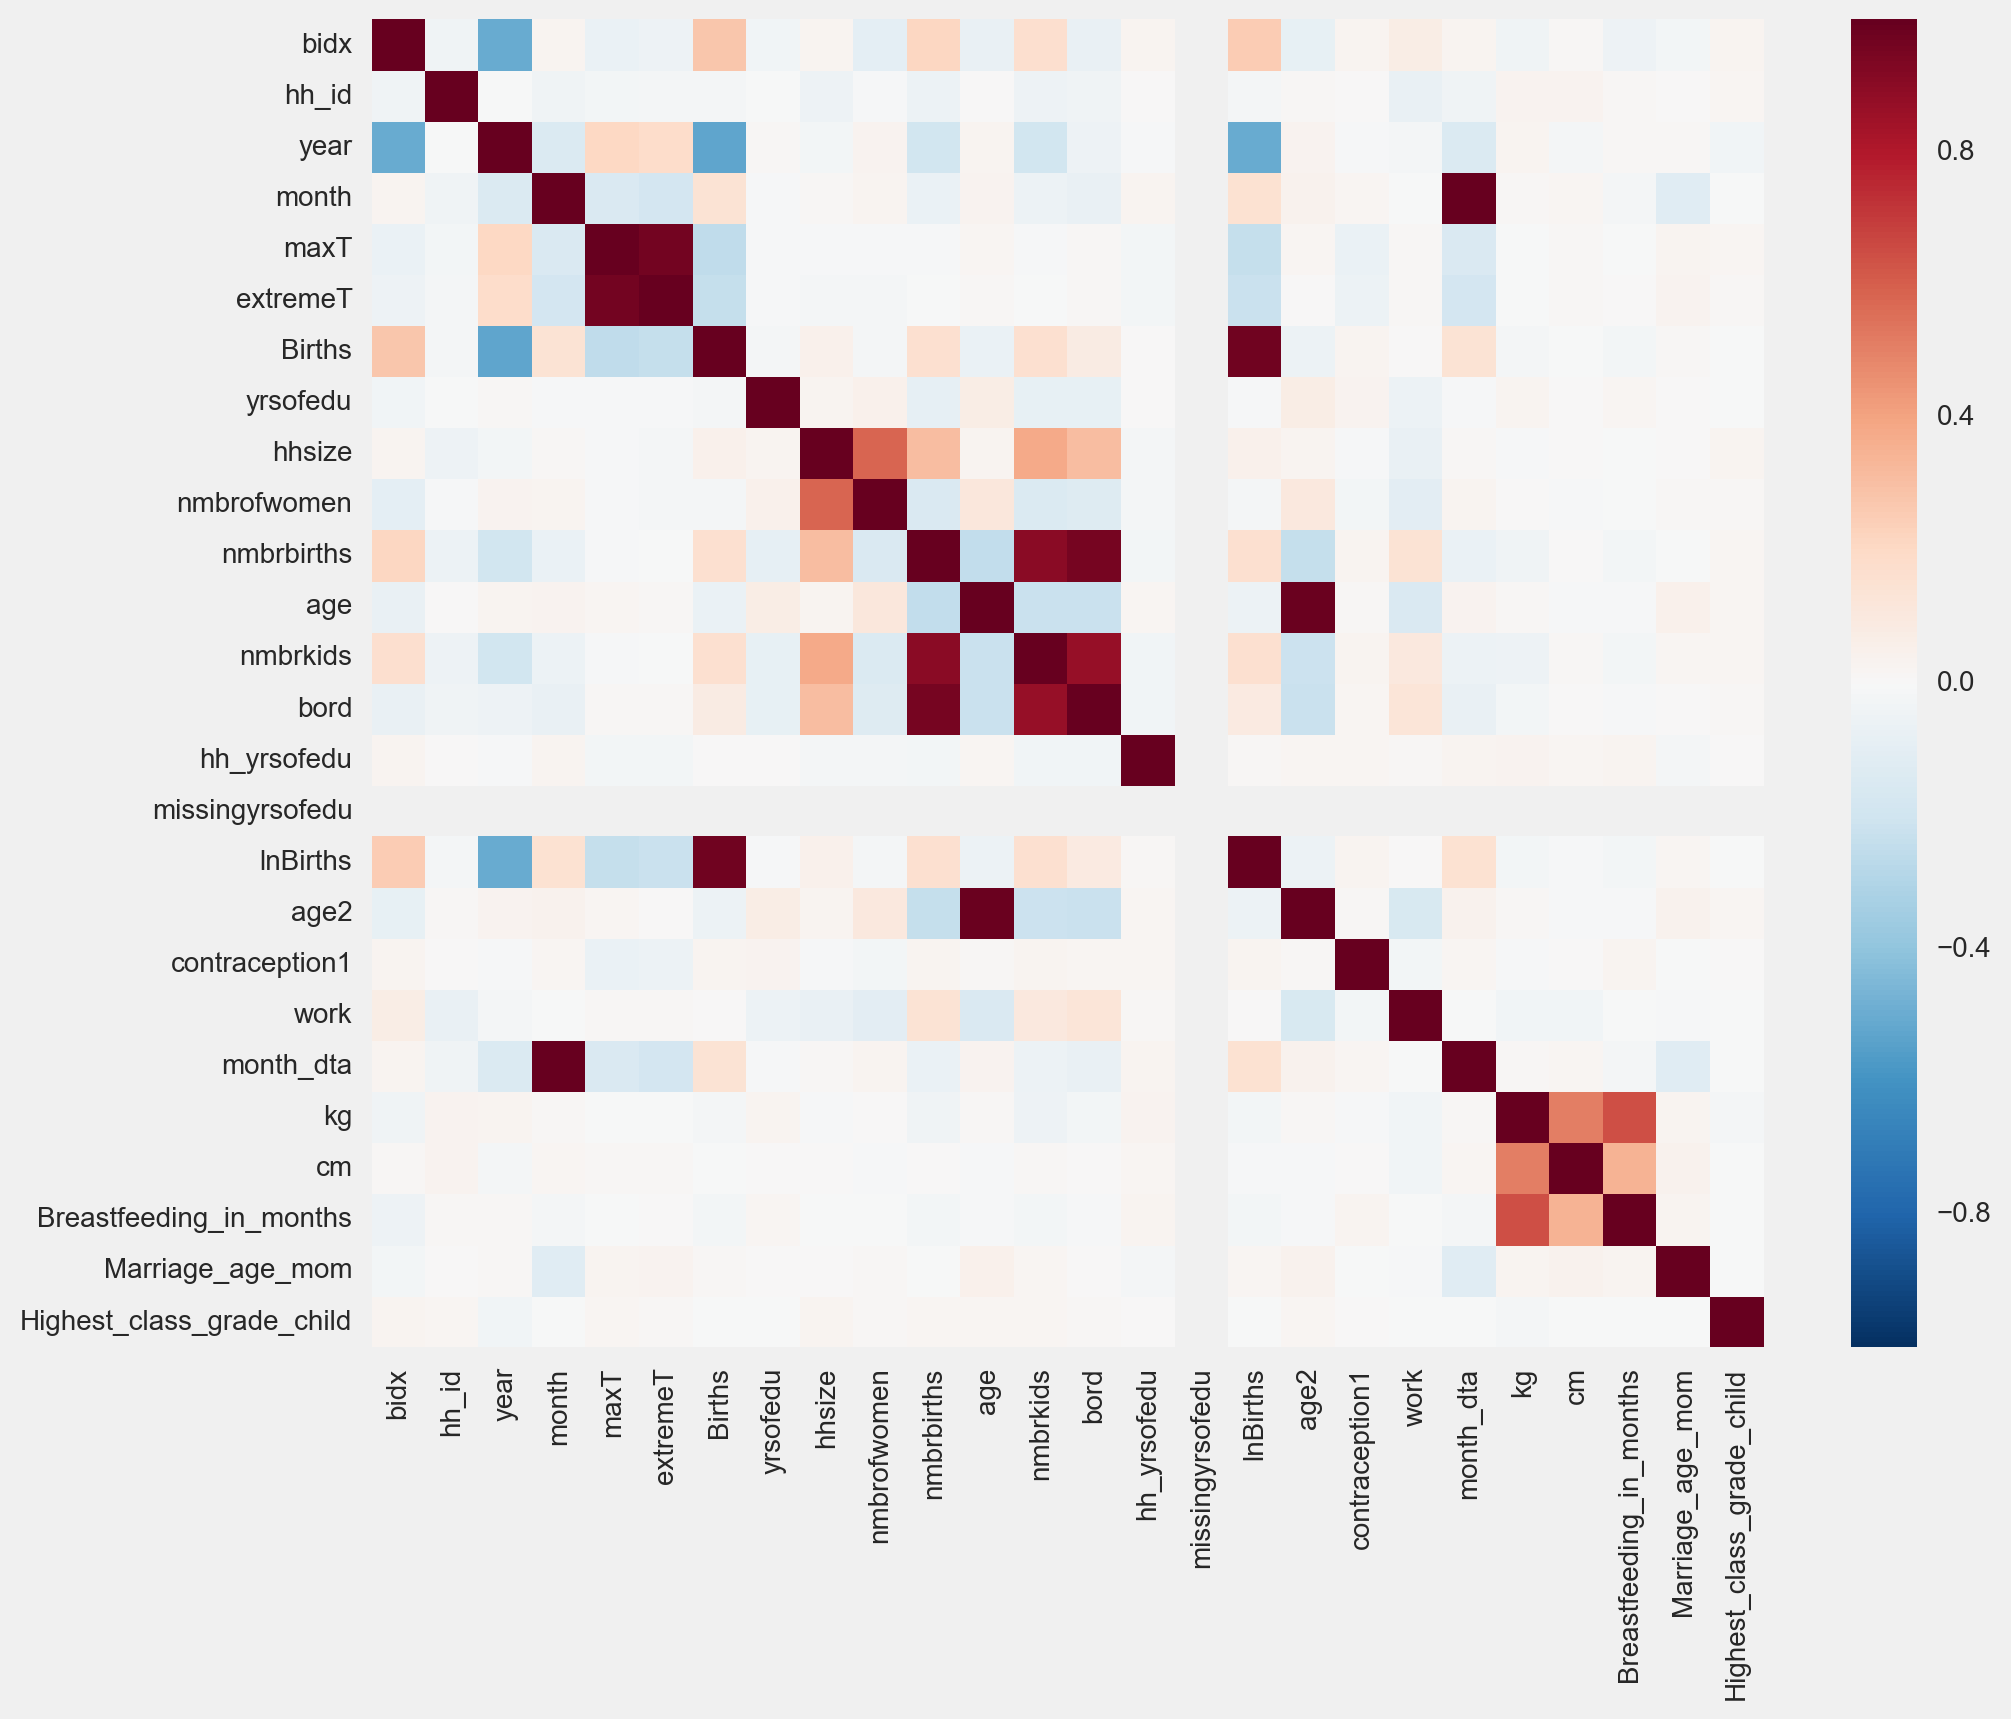

In [12]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

sns.heatmap(df.corr(), ax=ax)
plt.show()

In [13]:
df.corr()

,bidx,hh_id,year,month,maxT,extremeT,Births,yrsofedu,hhsize,nmbrofwomen,...,lnBirths,age2,contraception1,work,month_dta,kg,cm,Breastfeeding_in_months,Marriage_age_mom,Highest_class_grade_child
bidx,1.000000,-0.042925,-0.502600,0.026245,-0.069162,-0.051416,0.275472,-0.034549,0.028570,-0.099314,...,0.257052,-0.078691,0.023654,0.072847,0.026245,-0.042133,0.011409,-0.051490,-0.030991,0.028780
hh_id,-0.042925,1.000000,-0.001901,-0.042609,-0.024446,-0.017797,-0.016805,-0.003958,-0.053644,-0.011836,...,-0.018340,0.008925,0.001358,-0.075365,-0.042609,0.033272,0.038430,0.007832,0.001651,0.022001
year,-0.502600,-0.001901,1.000000,-0.141153,0.204290,0.180098,-0.528038,0.010443,-0.026111,0.038228,...,-0.501910,0.032590,-0.015594,-0.016689,-0.141153,0.026391,-0.020571,0.011874,0.013093,-0.033520
month,0.026245,-0.042609,-0.141153,1.000000,-0.155808,-0.187423,0.147220,-0.013735,0.009663,0.023885,...,0.154405,0.040603,0.016478,-0.006389,1.000000,0.009513,0.018363,-0.021175,-0.117358,-0.003773
maxT,-0.069162,-0.024446,0.204290,-0.155808,1.000000,0.963301,-0.250380,-0.008752,-0.014895,-0.014394,...,-0.237172,0.015634,-0.062567,0.013937,-0.155808,-0.007362,0.011624,-0.003273,0.028954,0.019068
extremeT,-0.051416,-0.017797,0.180098,-0.187423,0.963301,1.000000,-0.238389,-0.008054,-0.017728,-0.022777,...,-0.222588,0.006192,-0.057094,0.014510,-0.187423,-0.004728,0.015307,0.002014,0.033463,0.015346
Births,0.275472,-0.016805,-0.528038,0.147220,-0.250380,-0.238389,1.000000,-0.016248,0.047765,-0.016516,...,0.975782,-0.060169,0.023835,0.003945,0.147220,-0.019293,-0.003416,-0.026150,0.010225,-0.007802
yrsofedu,-0.034549,-0.003958,0.010443,-0.013735,-0.008752,-0.008054,-0.016248,1.000000,0.029110,0.047661,...,-0.015489,0.074172,0.037484,-0.059828,-0.013735,0.029933,0.007545,0.021953,0.007072,-0.003653
hhsize,0.028570,-0.053644,-0.026111,0.009663,-0.014895,-0.017728,0.047765,0.029110,1.000000,0.583986,...,0.048604,0.026592,-0.011081,-0.072728,0.009663,-0.010204,0.002448,-0.007057,0.002818,0.028678
nmbrofwomen,-0.099314,-0.011836,0.038228,0.023885,-0.014394,-0.022777,-0.016516,0.047661,0.583986,1.000000,...,-0.015880,0.108513,-0.031115,-0.105258,0.023885,0.006563,-0.009704,-0.007124,0.012708,0.010594


In [14]:
#Here I am trying to see the mean weight and height of children born in each months. DHS wights and heights are 
#measured by 1 decimal. KG AND CM NEEDS TO BE ADJUSTED BACK TO ORIGINAL VALUE. 
df.groupby(['month', 'kg', 'cm'], sort=True)[['Breastfeeding_in_months']].mean().sort_values(by=['Breastfeeding_in_months'], ascending=False).reset_index()

,month,kg,cm,Breastfeeding_in_months
0,9,59.0,115.000000,59.0
1,11,59.0,119.000000,59.0
2,9,58.0,119.000000,58.0
3,7,58.0,99.000000,58.0
4,9,58.0,122.000000,58.0
5,9,57.0,117.000000,57.0
6,2,57.0,118.000000,57.0
7,2,57.0,90.000000,57.0
8,1,57.0,115.000000,57.0
9,9,55.0,126.000000,55.0


In [15]:
#sorting df with less than 4 kg. There is a data entry error. 
df[df['kg'] <4]

,bidx,hh_id,year,month,maxT,extremeT,Births,v013,v024,v025,...,work,education1,month_dta,kg,cm,Sex of child,Breastfeeding_in_months,Prolonged_labour,Marriage_age_mom,Highest_class_grade_child
0,2,212,94,10,91.2000,94.0000,92,25-29,dhaka,rural,...,3,primary,10,1.0,60.000000,female,1.000000,no,14.000000,4.92692
8,2,250,91,10,87.6673,92.8364,88,20-24,dhaka,rural,...,3,no education,10,2.0,66.000000,male,2.000000,no,12.000000,4.92692
32,1,96,94,10,91.2000,94.0000,92,15-19,dhaka,rural,...,1,no education,10,2.0,40.000000,female,2.000000,yes,13.000000,5.00000
40,1,85,94,10,91.2000,94.0000,92,25-29,dhaka,urban,...,1,higher,10,0.0,30.000000,male,0.000000,no,9.000000,4.92692
41,1,51,93,10,87.6673,92.8364,120,15-19,dhaka,rural,...,3,primary,10,2.0,60.000000,female,2.000000,no,10.000000,10.00000
49,1,35,94,10,91.2000,94.0000,92,20-24,dhaka,urban,...,2,no education,10,2.0,44.000000,male,2.000000,no,18.000000,3.00000
74,3,76,90,10,86.4000,93.0000,126,25-29,dhaka,rural,...,3,no education,10,3.0,20.000000,male,20.043116,yes,13.000000,2.00000
78,1,43,94,10,91.2000,94.0000,92,25-29,dhaka,rural,...,2,primary,10,0.0,29.000000,female,0.000000,no,13.000000,7.00000
90,2,45,91,10,87.6673,92.8364,88,20-24,dhaka,rural,...,3,no education,10,3.0,51.000000,male,3.000000,no,15.000000,4.92692
105,2,16,92,10,87.6673,92.8364,101,35-39,dhaka,urban,...,2,no education,10,3.0,45.000000,female,3.000000,no,17.000000,7.00000


In [16]:
df.groupby(['month'], sort=True)[['Births']].sum().sort_values(by=['Births'], ascending=False).reset_index()

,month,Births
0,11,32596
1,12,23399
2,10,23131
3,1,22114
4,9,19741
5,2,19047
6,3,12445
7,5,9908
8,8,9812
9,4,6967


In [17]:
df1= df[(df.month > 10)] 
df1
#Data will be merged. Sorting out birth months >10 to calculate the conception month

,bidx,hh_id,year,month,maxT,extremeT,Births,v013,v024,v025,...,work,education1,month_dta,kg,cm,Sex of child,Breastfeeding_in_months,Prolonged_labour,Marriage_age_mom,Highest_class_grade_child
233,1,74,90,11,85.8000,90.0000,173,25-29,dhaka,rural,...,2,no education,11,35.000000,114.000000,male,35.000000,yes,16.000000,2.00000
234,1,170,94,11,87.6673,92.8364,121,25-29,dhaka,rural,...,1,primary,11,29.000000,108.000000,female,29.000000,yes,19.000000,4.92692
235,2,90,92,11,85.4000,92.0000,123,20-24,dhaka,rural,...,3,no education,11,28.000000,87.000000,male,3.000000,no,6.000000,4.00000
236,1,128,96,11,87.6673,92.8364,84,30-34,dhaka,rural,...,1,secondary,11,53.000000,134.000000,female,20.043116,no,19.000000,4.92692
237,1,225,95,11,87.6673,92.8364,82,25-29,dhaka,rural,...,3,no education,11,29.236856,99.650267,female,1.000000,no,13.000000,3.00000
238,1,164,96,11,87.6673,92.8364,84,20-24,dhaka,rural,...,3,secondary,11,17.000000,113.000000,male,17.000000,no,12.000000,4.92692
239,1,218,94,11,87.6673,92.8364,121,15-19,dhaka,rural,...,2,no education,11,10.000000,62.000000,male,10.000000,yes,15.000000,4.92692
240,1,8,92,11,85.4000,92.0000,123,25-29,dhaka,rural,...,3,no education,11,46.000000,598.000000,female,46.000000,no,12.000000,4.92692
241,2,88,92,11,85.4000,92.0000,123,25-29,dhaka,rural,...,3,no education,11,2.000000,40.000000,female,2.000000,yes,12.000000,2.00000
242,1,18,94,11,87.6673,92.8364,121,20-24,dhaka,rural,...,2,primary,11,53.000000,133.000000,male,20.043116,no,15.000000,8.00000


In [18]:
df2= df[(df.month < 10)] 
df2
#Data will be merged. Sorting out birth months <10 to calculate the conception month

,bidx,hh_id,year,month,maxT,extremeT,Births,v013,v024,v025,...,work,education1,month_dta,kg,cm,Sex of child,Breastfeeding_in_months,Prolonged_labour,Marriage_age_mom,Highest_class_grade_child
745,2,28,93,1,87.6673,92.8364,106,20-24,dhaka,rural,...,2,no education,1,20.000000,99.000000,female,20.000000,no,17.000000,4.92692
746,2,27,94,1,87.6673,92.8364,123,20-24,dhaka,rural,...,2,no education,1,27.000000,114.000000,female,27.000000,no,12.000000,8.00000
747,3,453,91,1,87.6673,92.8364,116,20-24,dhaka,rural,...,3,no education,1,35.000000,106.000000,male,24.000000,no,14.000000,6.00000
748,1,189,94,1,87.6673,92.8364,123,30-34,dhaka,urban,...,1,primary,1,21.000000,95.000000,male,21.000000,yes,12.000000,4.92692
749,1,51,92,1,87.6673,92.8364,98,35-39,dhaka,rural,...,1,primary,1,38.000000,101.000000,female,38.000000,no,15.000000,1.00000
750,1,53,94,1,87.6673,92.8364,123,25-29,dhaka,rural,...,3,no education,1,11.000000,81.000000,male,11.000000,yes,16.000000,4.92692
751,2,387,92,1,87.6673,92.8364,98,20-24,dhaka,rural,...,3,secondary,1,51.000000,123.000000,female,36.000000,no,15.000000,4.92692
752,1,548,91,1,87.6673,92.8364,116,25-29,dhaka,urban,...,2,primary,1,29.236856,99.650267,male,0.000000,no,15.000000,1.00000
753,1,3,95,1,87.6673,92.8364,86,25-29,dhaka,rural,...,2,primary,1,25.000000,79.000000,male,25.000000,no,14.000000,4.92692
754,1,10,94,1,87.6673,92.8364,123,20-24,dhaka,rural,...,3,no education,1,18.000000,66.000000,female,18.000000,no,14.000000,4.92692


In [19]:
df2['month1'] = df2['month']+12
df2
#obtaining correct month so conception month can be calculated

/Users/KiraEvsanaa/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,bidx,hh_id,year,month,maxT,extremeT,Births,v013,v024,v025,...,education1,month_dta,kg,cm,Sex of child,Breastfeeding_in_months,Prolonged_labour,Marriage_age_mom,Highest_class_grade_child,month1
745,2,28,93,1,87.6673,92.8364,106,20-24,dhaka,rural,...,no education,1,20.000000,99.000000,female,20.000000,no,17.000000,4.92692,13
746,2,27,94,1,87.6673,92.8364,123,20-24,dhaka,rural,...,no education,1,27.000000,114.000000,female,27.000000,no,12.000000,8.00000,13
747,3,453,91,1,87.6673,92.8364,116,20-24,dhaka,rural,...,no education,1,35.000000,106.000000,male,24.000000,no,14.000000,6.00000,13
748,1,189,94,1,87.6673,92.8364,123,30-34,dhaka,urban,...,primary,1,21.000000,95.000000,male,21.000000,yes,12.000000,4.92692,13
749,1,51,92,1,87.6673,92.8364,98,35-39,dhaka,rural,...,primary,1,38.000000,101.000000,female,38.000000,no,15.000000,1.00000,13
750,1,53,94,1,87.6673,92.8364,123,25-29,dhaka,rural,...,no education,1,11.000000,81.000000,male,11.000000,yes,16.000000,4.92692,13
751,2,387,92,1,87.6673,92.8364,98,20-24,dhaka,rural,...,secondary,1,51.000000,123.000000,female,36.000000,no,15.000000,4.92692,13
752,1,548,91,1,87.6673,92.8364,116,25-29,dhaka,urban,...,primary,1,29.236856,99.650267,male,0.000000,no,15.000000,1.00000,13
753,1,3,95,1,87.6673,92.8364,86,25-29,dhaka,rural,...,primary,1,25.000000,79.000000,male,25.000000,no,14.000000,4.92692,13
754,1,10,94,1,87.6673,92.8364,123,20-24,dhaka,rural,...,no education,1,18.000000,66.000000,female,18.000000,no,14.000000,4.92692,13


In [20]:
#Assuming that all pregnancies were full term, I am creating new column called conception
df1['Conception'] = df1['month']-9
df1

/Users/KiraEvsanaa/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,bidx,hh_id,year,month,maxT,extremeT,Births,v013,v024,v025,...,education1,month_dta,kg,cm,Sex of child,Breastfeeding_in_months,Prolonged_labour,Marriage_age_mom,Highest_class_grade_child,Conception
233,1,74,90,11,85.8000,90.0000,173,25-29,dhaka,rural,...,no education,11,35.000000,114.000000,male,35.000000,yes,16.000000,2.00000,2
234,1,170,94,11,87.6673,92.8364,121,25-29,dhaka,rural,...,primary,11,29.000000,108.000000,female,29.000000,yes,19.000000,4.92692,2
235,2,90,92,11,85.4000,92.0000,123,20-24,dhaka,rural,...,no education,11,28.000000,87.000000,male,3.000000,no,6.000000,4.00000,2
236,1,128,96,11,87.6673,92.8364,84,30-34,dhaka,rural,...,secondary,11,53.000000,134.000000,female,20.043116,no,19.000000,4.92692,2
237,1,225,95,11,87.6673,92.8364,82,25-29,dhaka,rural,...,no education,11,29.236856,99.650267,female,1.000000,no,13.000000,3.00000,2
238,1,164,96,11,87.6673,92.8364,84,20-24,dhaka,rural,...,secondary,11,17.000000,113.000000,male,17.000000,no,12.000000,4.92692,2
239,1,218,94,11,87.6673,92.8364,121,15-19,dhaka,rural,...,no education,11,10.000000,62.000000,male,10.000000,yes,15.000000,4.92692,2
240,1,8,92,11,85.4000,92.0000,123,25-29,dhaka,rural,...,no education,11,46.000000,598.000000,female,46.000000,no,12.000000,4.92692,2
241,2,88,92,11,85.4000,92.0000,123,25-29,dhaka,rural,...,no education,11,2.000000,40.000000,female,2.000000,yes,12.000000,2.00000,2
242,1,18,94,11,87.6673,92.8364,121,20-24,dhaka,rural,...,primary,11,53.000000,133.000000,male,20.043116,no,15.000000,8.00000,2


In [23]:
df2['Conception'] = df2['month1']-9
df2

/Users/KiraEvsanaa/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,bidx,hh_id,year,month,maxT,extremeT,Births,v013,v024,v025,...,month_dta,kg,cm,Sex of child,Breastfeeding_in_months,Prolonged_labour,Marriage_age_mom,Highest_class_grade_child,month1,Conception
745,2,28,93,1,87.6673,92.8364,106,20-24,dhaka,rural,...,1,20.000000,99.000000,female,20.000000,no,17.000000,4.92692,13,4
746,2,27,94,1,87.6673,92.8364,123,20-24,dhaka,rural,...,1,27.000000,114.000000,female,27.000000,no,12.000000,8.00000,13,4
747,3,453,91,1,87.6673,92.8364,116,20-24,dhaka,rural,...,1,35.000000,106.000000,male,24.000000,no,14.000000,6.00000,13,4
748,1,189,94,1,87.6673,92.8364,123,30-34,dhaka,urban,...,1,21.000000,95.000000,male,21.000000,yes,12.000000,4.92692,13,4
749,1,51,92,1,87.6673,92.8364,98,35-39,dhaka,rural,...,1,38.000000,101.000000,female,38.000000,no,15.000000,1.00000,13,4
750,1,53,94,1,87.6673,92.8364,123,25-29,dhaka,rural,...,1,11.000000,81.000000,male,11.000000,yes,16.000000,4.92692,13,4
751,2,387,92,1,87.6673,92.8364,98,20-24,dhaka,rural,...,1,51.000000,123.000000,female,36.000000,no,15.000000,4.92692,13,4
752,1,548,91,1,87.6673,92.8364,116,25-29,dhaka,urban,...,1,29.236856,99.650267,male,0.000000,no,15.000000,1.00000,13,4
753,1,3,95,1,87.6673,92.8364,86,25-29,dhaka,rural,...,1,25.000000,79.000000,male,25.000000,no,14.000000,4.92692,13,4
754,1,10,94,1,87.6673,92.8364,123,20-24,dhaka,rural,...,1,18.000000,66.000000,female,18.000000,no,14.000000,4.92692,13,4


In [24]:
dfA = df1.append(df2) #merging dataframes 
df1.isnull().sum()

bidx                         0
hh_id                        0
year                         0
month                        0
maxT                         0
extremeT                     0
Births                       0
v013                         0
v024                         0
v025                         0
education                    0
yrsofedu                     0
literacy                     2
electricity                  3
religion                     0
location                     0
hhsize                       0
nmbrofwomen                  0
edustatus                    0
nmbrbirths                   0
age                          0
nmbrkids                     0
abortion                     0
hhoccupation                 0
workstatus                   0
bord                         0
livingkids                   0
hh_yrsofedu                  0
birthcntrl                   0
missingyrsofedu              0
lnBirths                     0
age2                         0
contrace

In [26]:
dfA.groupby(['maxT'], sort=True)[['Conception']].mean().sort_values(by=['Conception'], ascending=False).reset_index()

,maxT,Conception
0,88.9000,10.000000
1,91.0000,10.000000
2,90.0000,9.677419
3,88.6000,9.000000
4,97.1000,7.000000
5,87.6673,6.705758
6,90.7000,6.000000
7,93.7000,6.000000
8,77.9000,5.000000
9,85.5000,5.000000


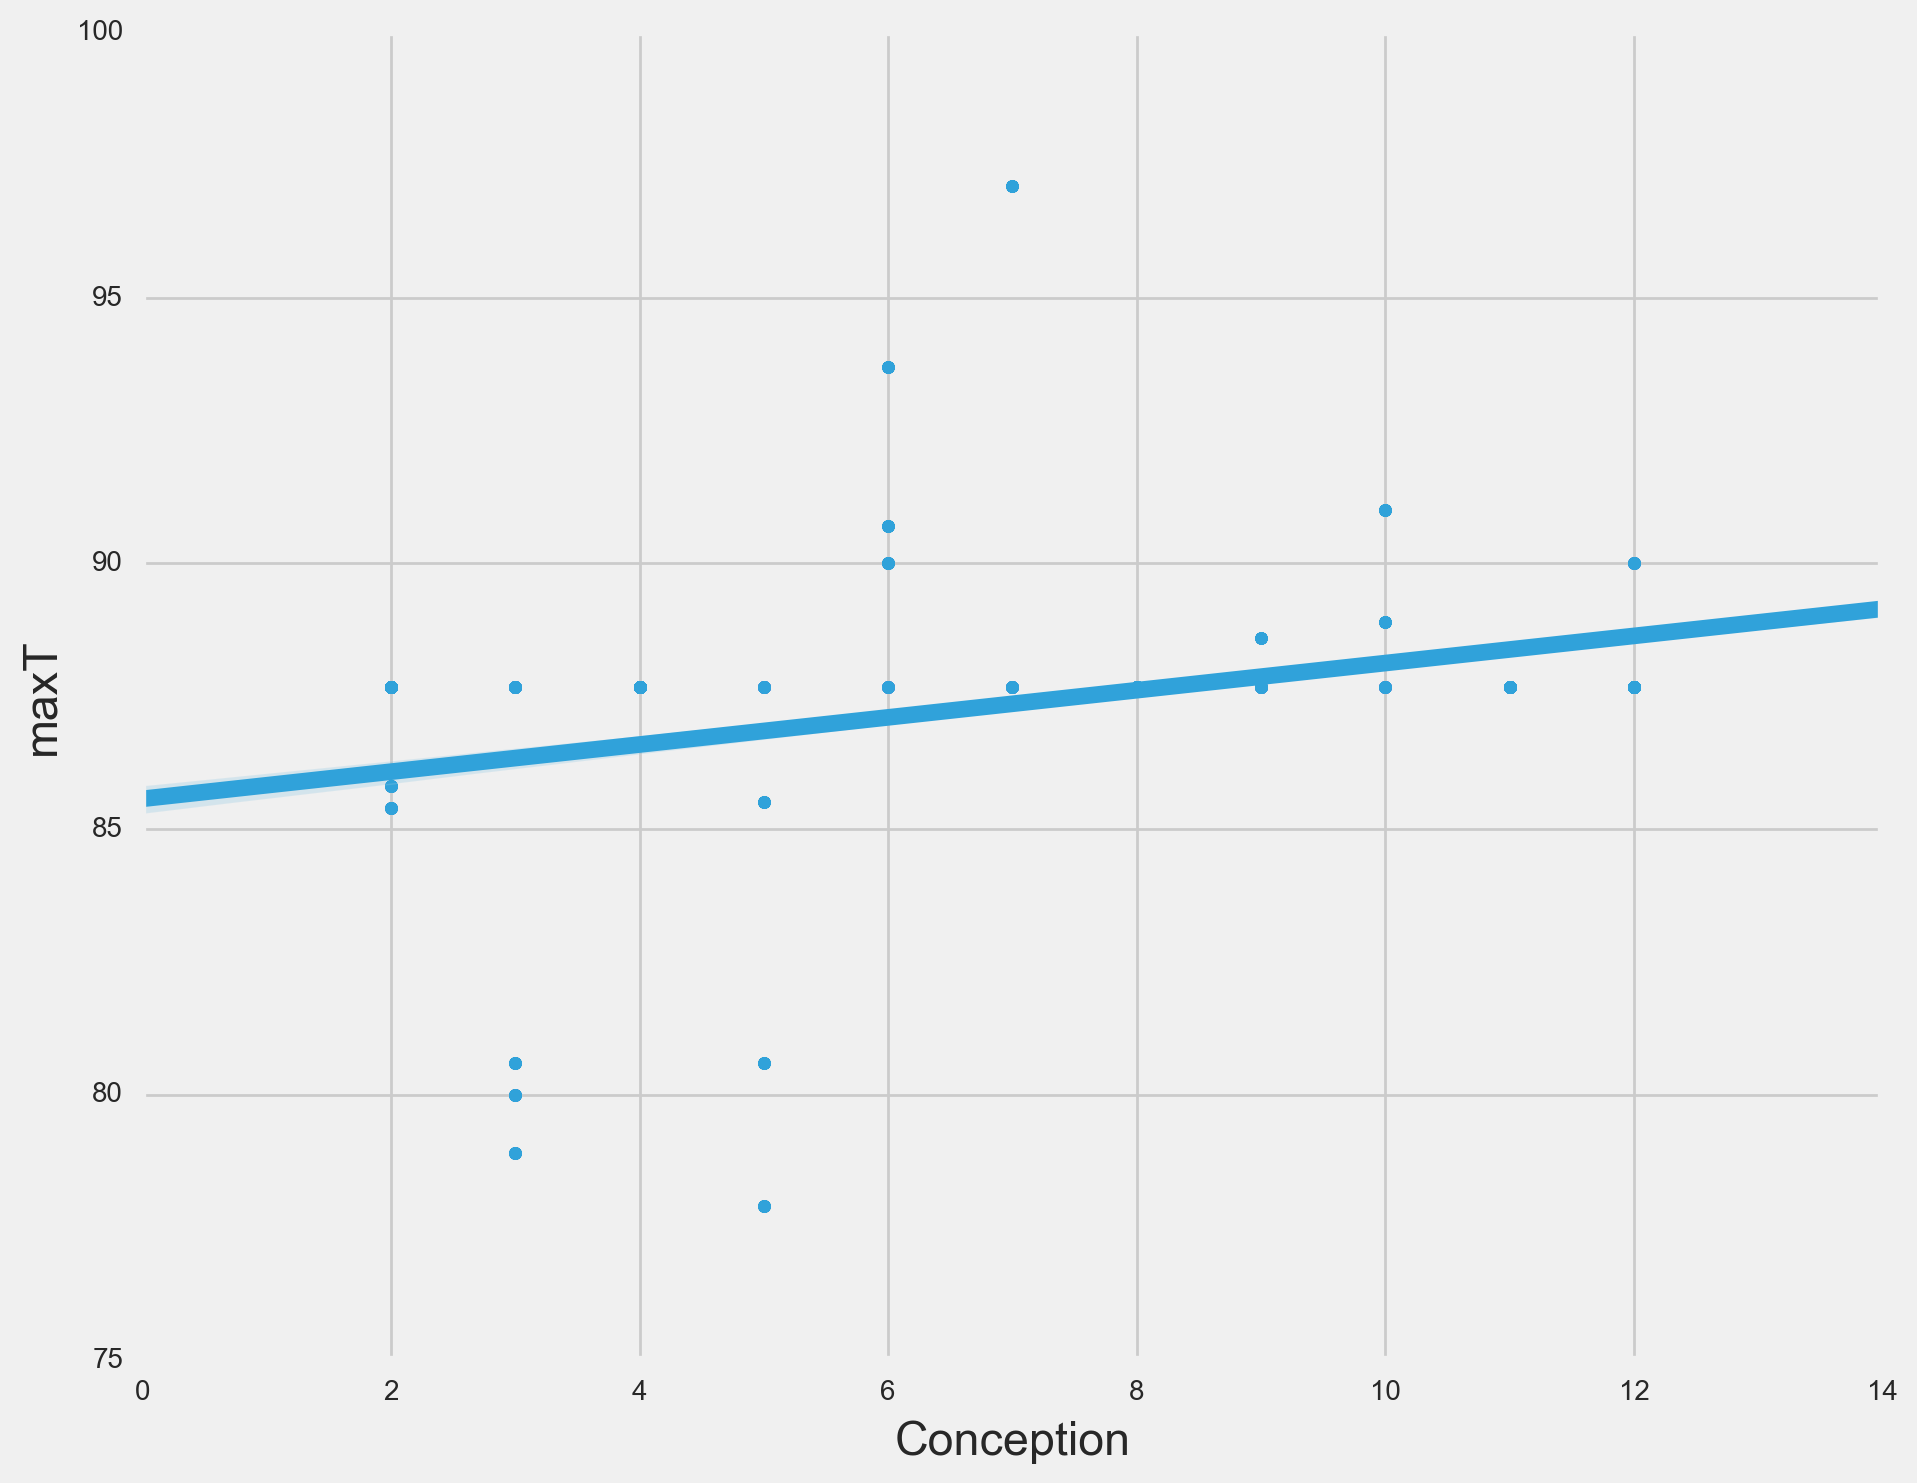

In [28]:
fig = plt.figure(figsize=(10,8))
sns.regplot(dfA['Conception'], dfA['maxT'], data=dfA)
plt.show()
#conception increases with increased temperature. PLOT TIME SERIES AND SEE IF THERE IS A DIP ANYWHERE

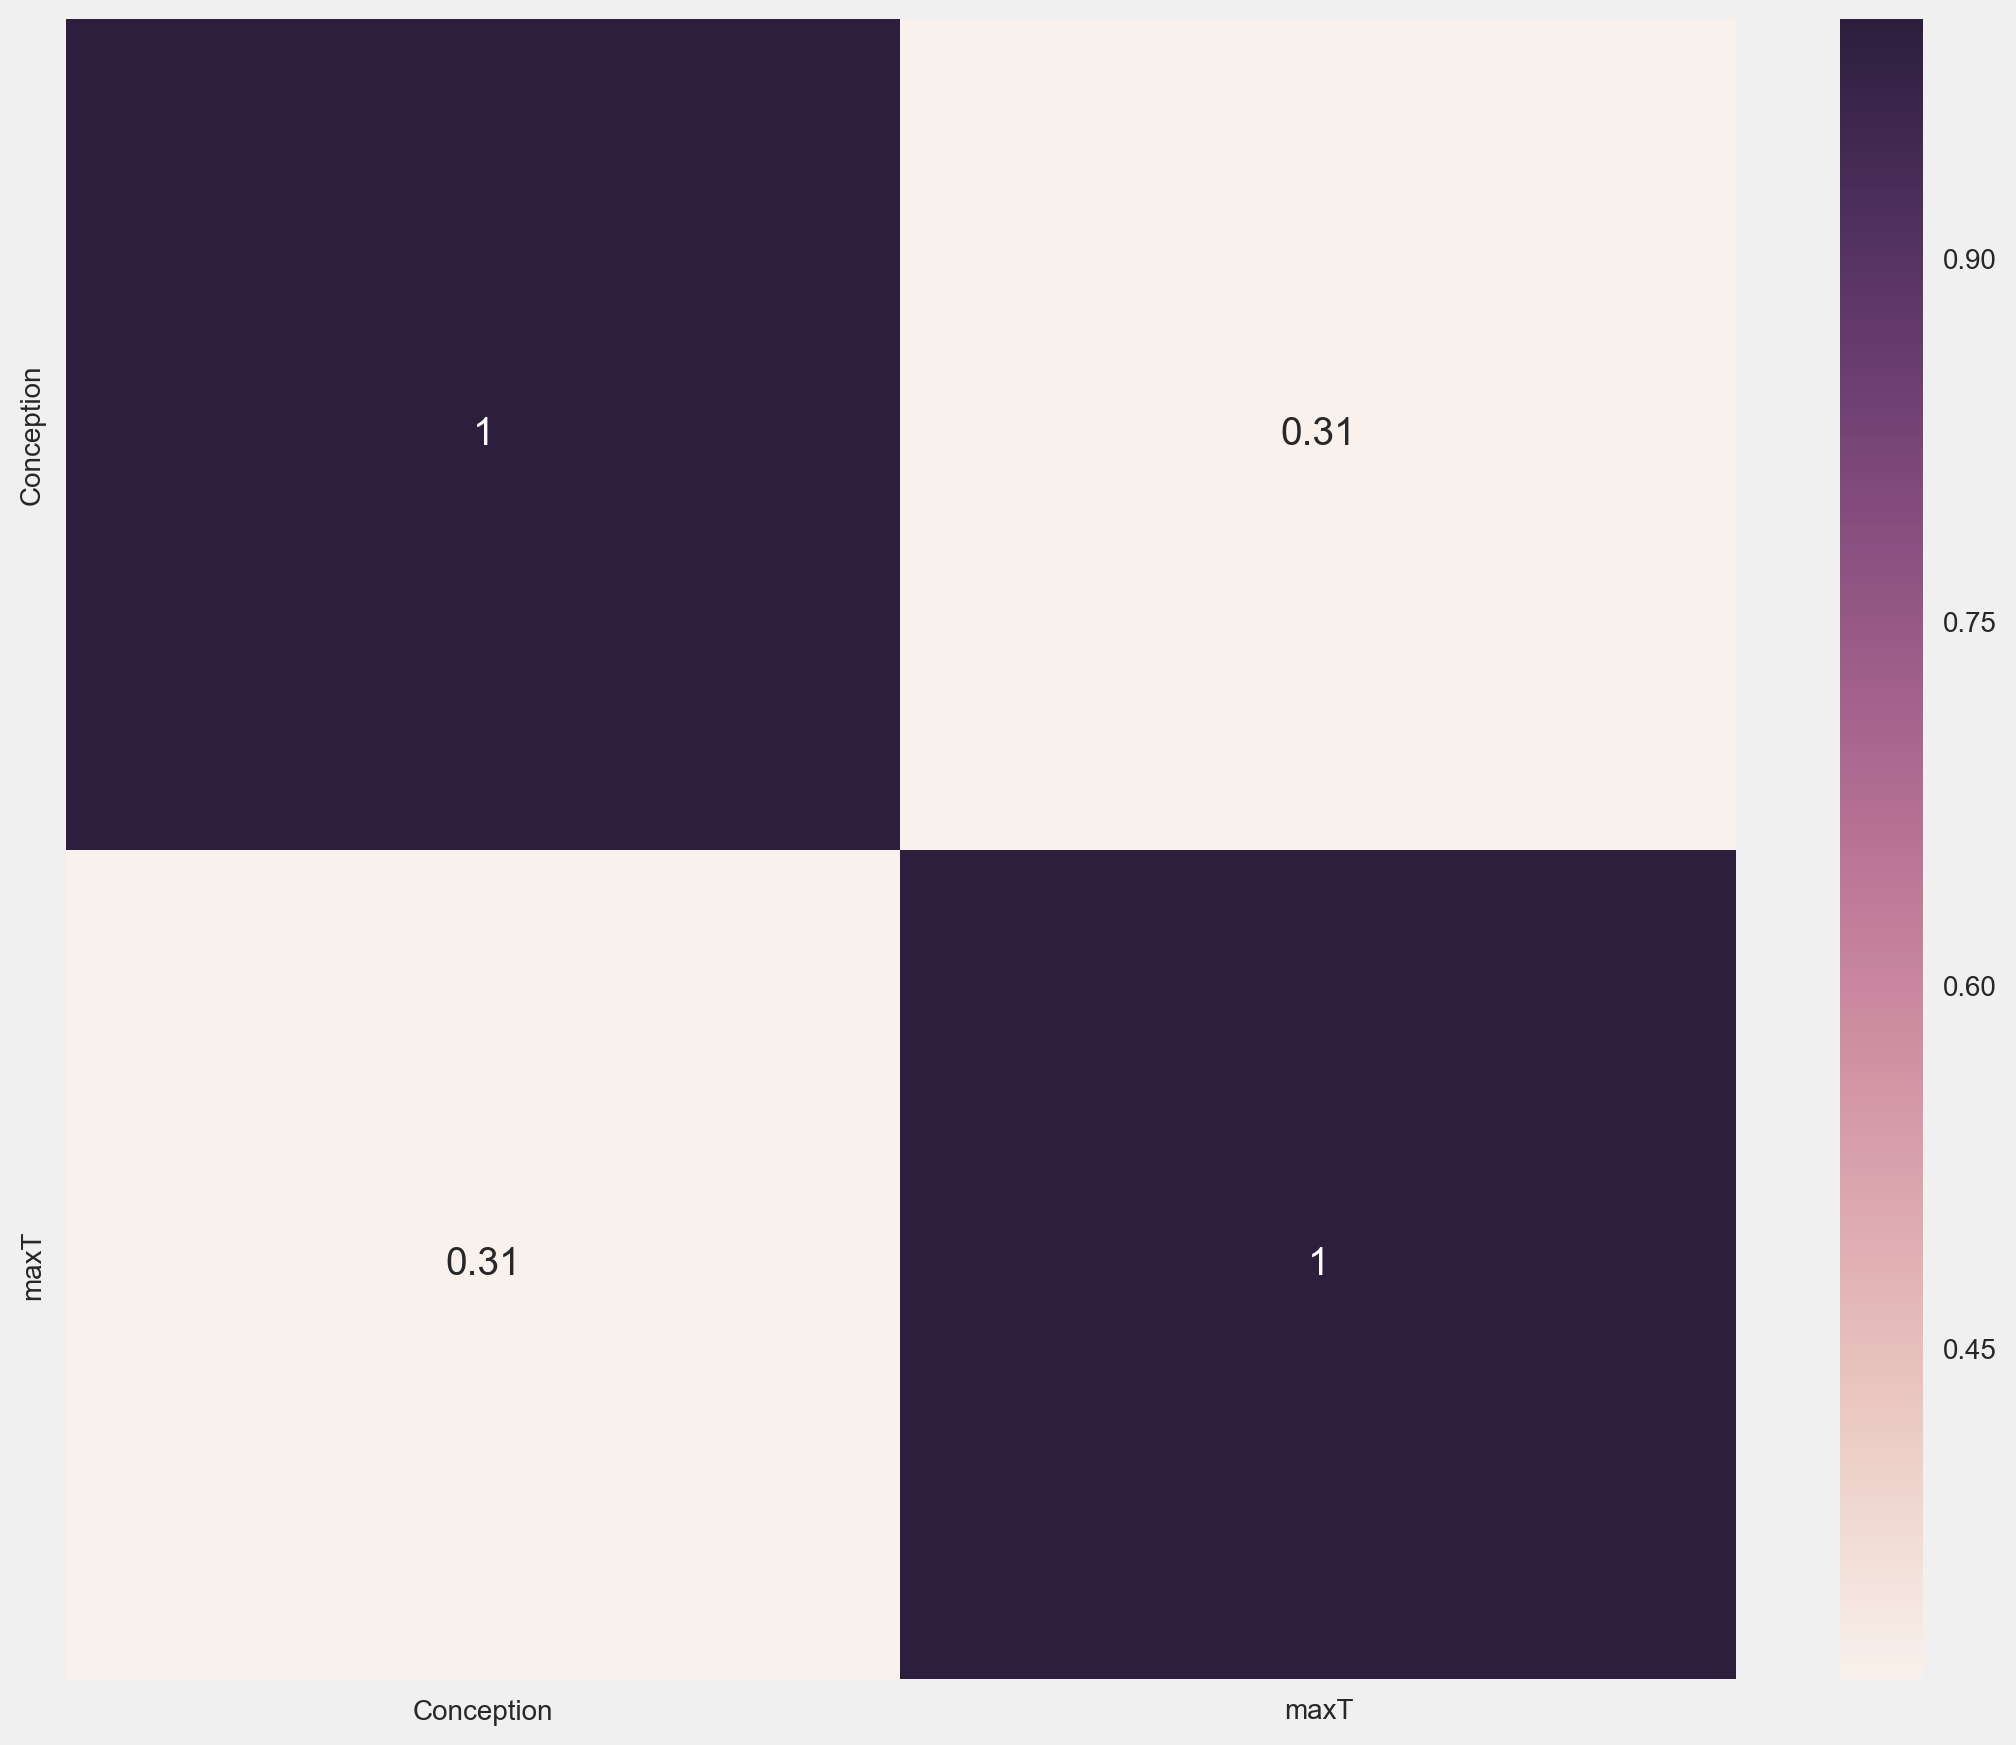

In [40]:
fig = plt.figure(figsize=(12,10))
ax = fig.gca()
sns.heatmap(dfA[['Conception', 'maxT']].corr(),annot=True, ax=ax)
plt.show()
#This shows weak positive correlation between max temperature and conception